In [1]:
import pandas as pd

## 1. Data Information

### 1. Data Loading

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print(train.head())
print(test.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### 2. Data Structure Learning

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
print(train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

### 3. SalePrice

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

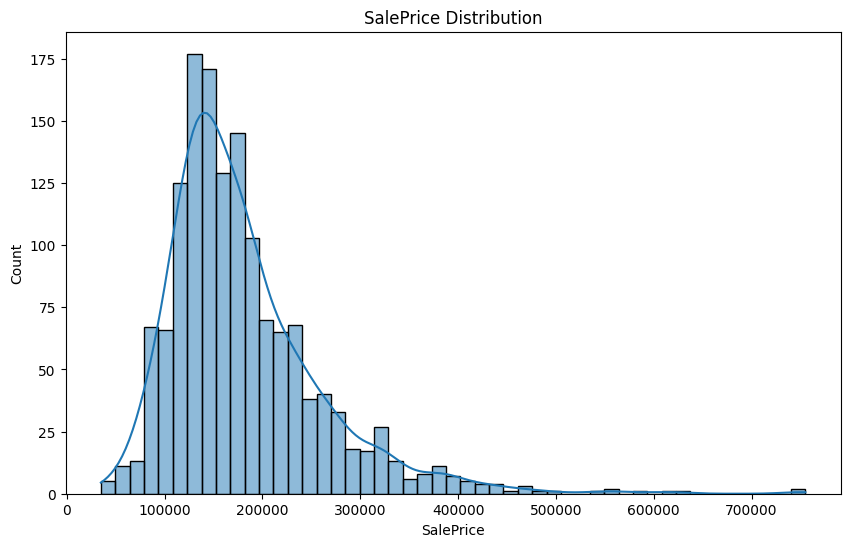

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(train['SalePrice'], kde=True)
plt.title('SalePrice Distribution')
plt.show()

## 2. Data pre-processing

### 1. Missing values observation

In [8]:
missing_values = train.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values>0])

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [9]:
train['PoolQC'].fillna('None', inplace=True)  # Most houses do not contain pools
train['MiscFeature'].fillna('None', inplace=True)  #  Same, most do not have anything misc
train['Alley'].fillna('None', inplace=True)  # No alley, whatsoever
train['Fence'].fillna('None', inplace=True)  # No fence
train['MasVnrType'].fillna('None', inplace=True)  # No stone faces
train['FireplaceQu'].fillna('None', inplace=True)  # No fireplace
train['LotFrontage'] = train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
# Lot width, let's have a median value by the whole neighborhood

garage_cols = ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_cols:
    train[col].fillna('None', inplace=True)

train['GarageYrBlt'].fillna(0, inplace=True)
# Most houses do not contain garages, so all the columns with 'Garage' will be filled with None, 
# but GarageYrBlt - is int, so 0

bsmt_cols = ['BsmtFinType2', 'BsmtFinType2', 'BsmtCond', 'BsmtQual', 'BsmtFinType1']
for col in bsmt_cols:
    train[col].fillna('None', inplace=True)

train['BsmtExposure'].fillna('None', inplace=True)
# No basement means None for categorials, ints will be converted to zeros

train['MasVnrArea'].fillna(0, inplace=True)
# Stone cladding square is absent, so the square is 0 squared meters

train['Electrical'].fillna(train['Electrical'].mode()[0], inplace=True)
# There's only one missing, so filling with the most common value 'Sbrkr'

C:\Users\mike7\AppData\Local\Temp\ipykernel_4192\782140884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['PoolQC'].fillna('None', inplace=True)  # Most houses do not contain pools
C:\Users\mike7\AppData\Local\Temp\ipykernel_4192\782140884.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

### 2. Correlation signs with SalePrice learning

In [10]:
# To find out what signs can be useful for the prediction,
# we check the correlation between SalePrice and other int signs
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train.select_dtypes(include=['object']).columns

corr_matrix = train[numeric_features].corr()  
# There was an error, because some data contained str
# We divided the data into numeric and categorical features
print(corr_matrix['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.349876
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

### 3. Signs classification

In [11]:
print(f"Numeric features: {numeric_features}")
print(f"")
print(f"Categorical features: {categorical_features}")

Numeric features: Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Categorical features: Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinTy

## 3. Data analysis

### 1. Data review

In [12]:
# General data info
print(train.info())
# Stats information about numeric features
print(train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 2. Dependencies visualization between features

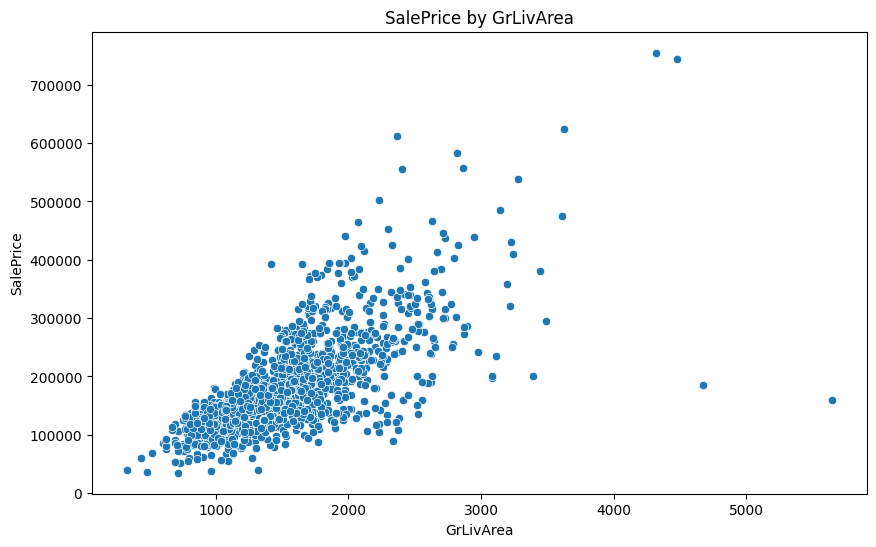

In [13]:
# Between living area and SalePrice, f.e.
plt.figure(figsize=(10,6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('SalePrice by GrLivArea')
plt.show()

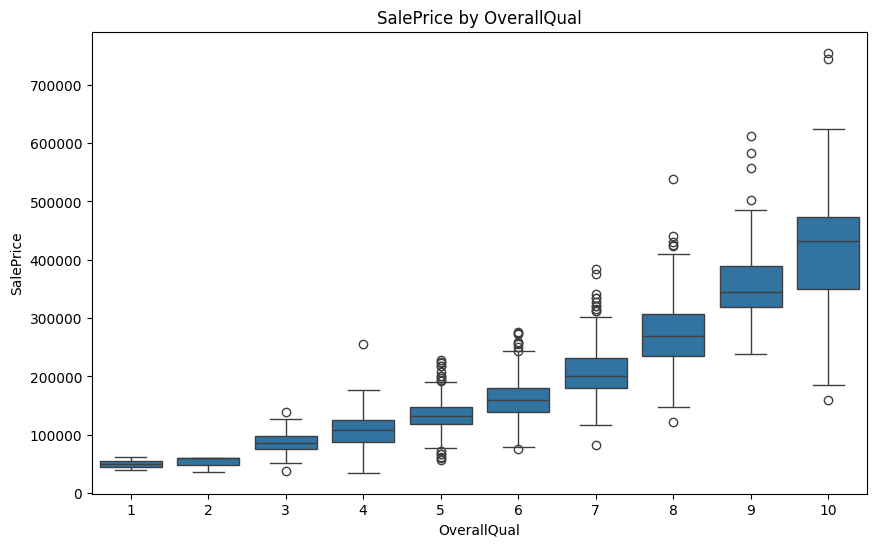

In [14]:
# Between overall quality and SalePrice, f.e.
plt.figure(figsize=(10,6))
sns.boxplot(x=train['OverallQual'], y=train['SalePrice'])
plt.title('SalePrice by OverallQual')
plt.show()

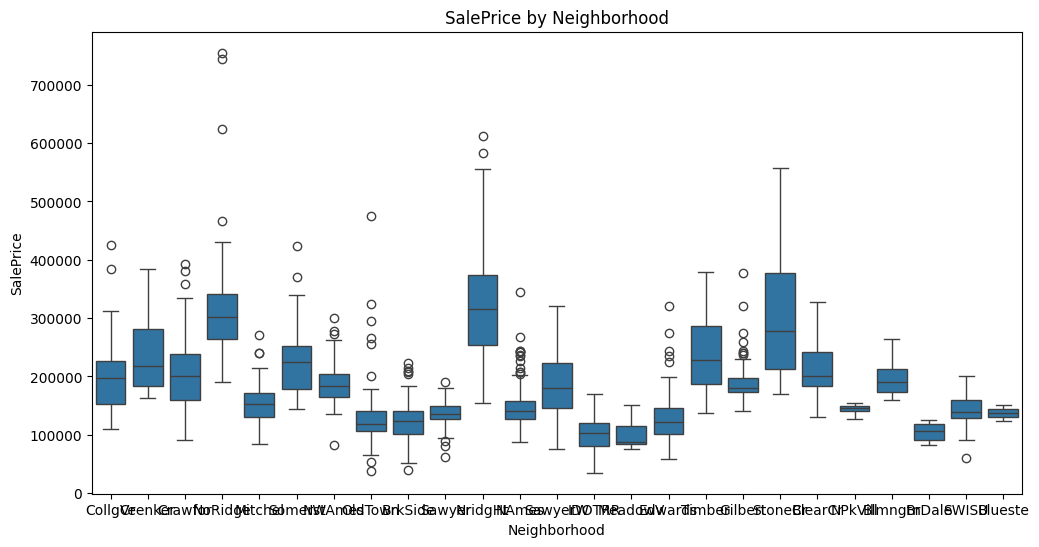

In [15]:
# Between neighborhood and SalePrice, f.e.
plt.figure(figsize=(12,6))
sns.boxplot(x=train['Neighborhood'], y=train['SalePrice'])
plt.title('SalePrice by Neighborhood')
plt.show()

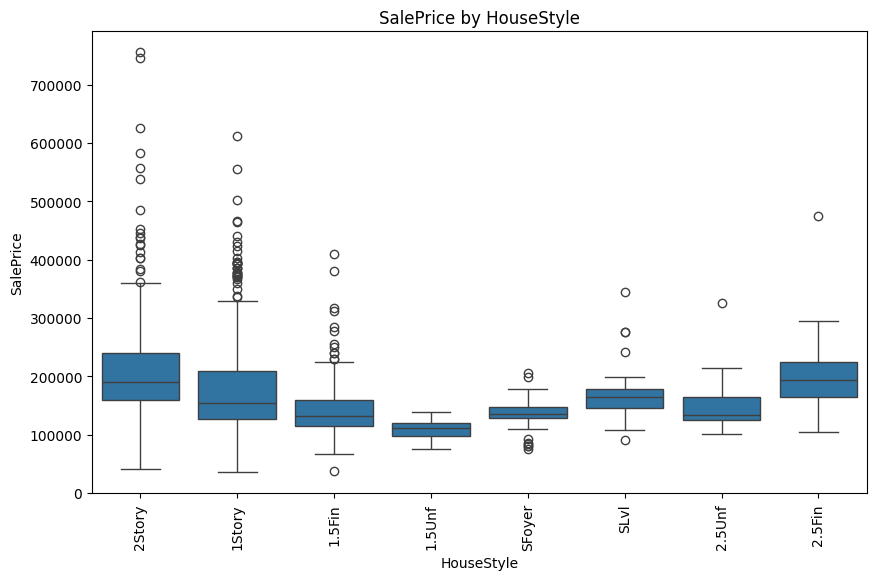

In [16]:
# Between house style and SalePrice, f.e.
plt.figure(figsize=(10,6))
sns.boxplot(x=train['HouseStyle'], y=train['SalePrice'])
plt.xticks(rotation=90)
plt.title('SalePrice by HouseStyle')
plt.show()

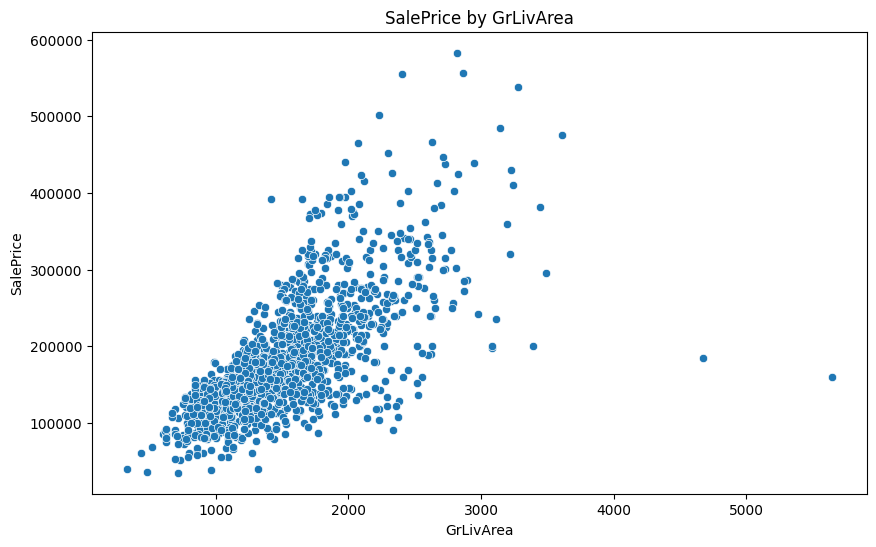

In [17]:
# Removing ejections, f.e. under 600K only
# Same step as before
# Between living area and SalePrice, f.e.
train = train[train['SalePrice'] <= 600000]  # to remove ejections
plt.figure(figsize=(10,6))
sns.scatterplot(x=train['GrLivArea'], y=train['SalePrice'])
plt.title('SalePrice by GrLivArea')
plt.show()

## 4. Model creation

### 1. Data split into training and testing

In [18]:
from sklearn.model_selection import train_test_split

X = train.drop('SalePrice', axis=1)  # features (all columns, except SalePrice)
y = train['SalePrice']  # SalePrice

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=420)

### 2. Choosing the model

In [19]:
# Dropping object values to train only numberic data
train_encoded = pd.get_dummies(train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1)

test_encoded.fillna(0, inplace=True)

In [20]:
X = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
# Predictions by LR
y_pred_lr = lr_model.predict(X_test)

# Model grade
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f"RMSE_LR: {rmse_lr}")

RMSE_LR: 26076.076085534343


In [25]:
# Ridge-Regression
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [26]:
# Predictions by Ridge
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge

# Model grade
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE_Ridge: {rmse_ridge}")

RMSE_Ridge: 26599.247715258956


In [27]:
# Lasso-Regression
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

D:\Python\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+11, tolerance: 6.460e+08
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [28]:
# Predictions by Lasso
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso

# Model grade
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE_Lasso: {rmse_lasso}")

RMSE_Lasso: 25402.338733308494


In [29]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=7)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=7)

In [30]:
# Predictions by Random Forest
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

# Model grade
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f"RMSE_RF: {rmse_rf}")

RMSE_RF: 25941.604819533688


In [31]:
# Gradient Boosting (XGBoost)
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
# Predictions by XGBoost
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

# Model grade
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE_XGB: {rmse_xgb}")

RMSE_XGB: 26307.278019832414


In [33]:
print(f'RMSE Linear Regression: {rmse_lr}')
print(f'RMSE Ridge-Regression: {rmse_ridge}')
print(f'RMSE Lasso-Regression: {rmse_lasso}')
print(f'RMSE Random Forest: {rmse_rf}')
print(f'RMSE XGBoost: {rmse_xgb}')

RMSE Linear Regression: 26076.076085534343
RMSE Ridge-Regression: 26599.247715258956
RMSE Lasso-Regression: 25402.338733308494
RMSE Random Forest: 25941.604819533688
RMSE XGBoost: 26307.278019832414


## 5. Model optimization

### 1. Lasso-regression optimization

In [34]:
from sklearn.model_selection import GridSearchCV

# Alpha values
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# GridSearchCV setting
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)

# Best result
best_lasso = lasso_grid.best_estimator_

D:\Python\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.455e+11, tolerance: 4.864e+08
  model = cd_fast.enet_coordinate_descent(
D:\Python\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.324e+11, tolerance: 5.433e+08
  model = cd_fast.enet_coordinate_descent(
D:\Python\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.175e+11, tolerance: 5.183e+08
  model = cd_f

In [35]:
# Predictions by best Lasso
y_pred_best_lasso = best_lasso.predict(X_test)
y_pred_best_lasso

# Model grade
rmse_best_lasso = np.sqrt(mean_squared_error(y_test, y_pred_best_lasso))
print(f"Best RMSE_Lasso: {rmse_best_lasso}")

Best RMSE_Lasso: 26217.470011323996


### 2. Random Forest optimization

In [41]:
rf_params = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestRegressor(), rf_params, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)

# Best model
best_rf = rf_grid.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
print(f"Best Random Forest: {rmse_best_rf}")

Best Random Forest: 25872.04752242027


## 6. Final steps

In [51]:
# Applying One-Hot Encoding to train and test data
# Because error was rising after step 4.2
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
test_encoded = pd.get_dummies(test, drop_first=True)

# Aligning columns of train and test data
X_train_encoded, test_encoded = X_train_encoded.align(test_encoded, join='left', axis=1)

# Filling NA in test data
test_encoded.fillna(0, inplace=True)

# Using the model for a prediction
y_pred_final = best_rf.predict(test_encoded)

# Creating DataFrame for sending
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_final})

# Output to csv
output.to_csv('nicky_rf.csv', index=False)

In [52]:
# Using the model for a prediction
y_pred_final = best_lasso.predict(test_encoded)

# Creating DataFrame for sending
output = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_final})

# Output to csv
output.to_csv('nicky_lasso.csv', index=False)